# Розрахункова робота

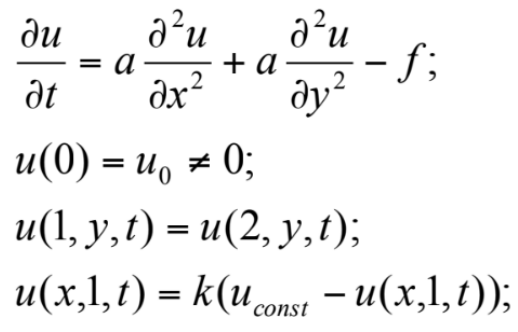

In [1]:
"""
Solving a Partial Differential Equation

"""

import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# ------------ Input ------------

a = 50.
w = h = 250.
dx = dy = 50.
lambda_value = 0.75

In [3]:
# ------------ Code ------------

def create_matrix(w, h, nx, ny, mu, lambda_value, func):
    r = 0.001 * w
    r2 = r**2
    cx, cy = 0.5 * w, 0.5 * h

    C = np.identity(nx * ny)
    B = np.identity(nx * ny)
    F = np.zeros((nx, ny))
    for i in range(nx):
        for j in range(ny):
            p2 = (i * dx - cx)**2 + (j * dy - cy)**2
            if p2 < r2:
                F[i, j] = func

    F = F.reshape((nx * ny, 1))
    for i in range(nx, len(C) - nx):
        if i % nx != 0 and (i + 1) % nx != 0:
            for j in range(len(C[0])):
                if j == i - 1 or j == i + 1 or j == i - nx or j == i + nx: 
                    C[i, j] = -mu * lambda_value
                if j == i:
                    C[i, j] = 1 + 4 * mu * lambda_value

    for i in range(len(C)):
        if i % nx == 0:
            C[i, i + 1] = -1
        if (i + 1) % nx == 0:
            C[i, i-1] = -1

    for i in range(nx, len(B) - nx):
        if i % nx != 0 and (i + 1) % nx != 0:
            for j in range(len(B[0])):
                if j == i - 1 or j == i + 1 or j == i - nx or j == i + nx: 
                    B[i, j] = mu * (1 - lambda_value)
                if j == i:
                    B[i, j] = 1 - 4 * mu * (1 - lambda_value)

    for i in range(len(B)):
        if i % nx == 0:
            B[i, i + 1] = -1
        if (i + 1) % nx == 0:
            B[i, i - 1] = -1

    B = np.linalg.inv(B)
    A = np.dot(B, C)
    Func = np.dot(B, F)
    Func = Func.reshape((nx * nx,))

    return A, Func


def visualize(A, F, b, nsteps, nx, ny):
    x = np.arange(-nx, ny, 2)
    y = np.arange(-nx, ny, 2)
    x, y = np.meshgrid(x, y)
    
    fig = plt.figure(figsize=(15, 15))
    fignum, nfig = 0, [0, round(nsteps * 1/3), round(nsteps * 2/3), nsteps - 1]
    for m in range(nsteps):
        if m in nfig:
            fignum += 1
            ax = fig.add_subplot(2, 2, fignum, projection='3d')
            surf = ax.plot_surface(x, y, b.reshape((nx, nx)), rstride=1, cstride=1, 
                                  cmap=cm.hot)
            ax.set_title('{:.1f} ms'.format(m * dt * 1000))
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            ax.set_zlabel('z')
        b = np.linalg.solve(A, b - F)

    fig.subplots_adjust(right=0.8, wspace=0.4, hspace=0.4)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar_ax.set_xlabel('$colorbar$', labelpad=20)
    fig.colorbar(surf, cax=cbar_ax)
    plt.show()

In [4]:
nx, ny = int(w / dx), int(h / dy)
dx2, dy2 = dx * dx, dy * dy
dt = dx2 * dy2 / (2 * a * (dx2 + dy2))
mu = a * dt / dx2
func = 1e+1 * dt * dt
print(f"Net size: {nx, ny}")
print(f"Time step: {dt}")
print(f"Mu: {mu}, Function: {func}")

A, F = create_matrix(w, h, nx, ny, mu, lambda_value, func)
b = 10 * np.ones(nx * nx)
for i in range(len(b)):
    if (i >= 0 and i <= nx - 1) or (i >= nx * (nx - 1) and i <= nx * nx - 1):
        b[i] = 15
print(f"\nA's shape: {A.shape}")
print(f"F's shape: {F.shape}")
print(f"b's shape: {b.shape}")

Net size: (5, 5)
Time step: 12.5
Mu: 0.25, Function: 1562.5

A's shape: (25, 25)
F's shape: (25,)
b's shape: (25,)


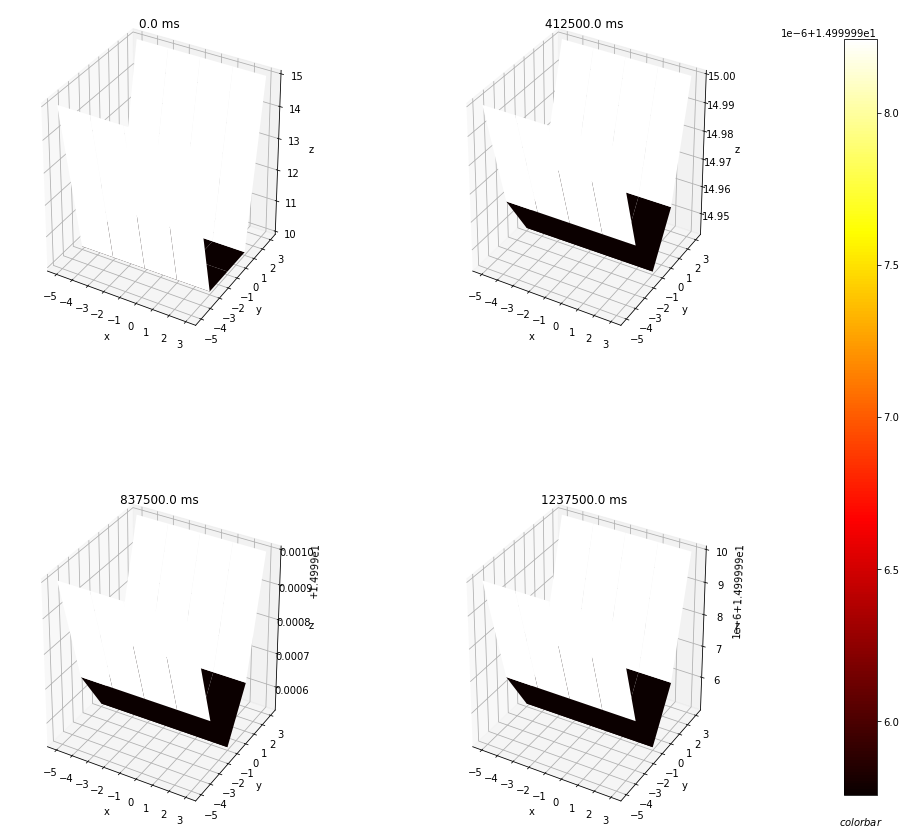

CPU times: user 1e+03 ms, sys: 618 ms, total: 1.62 s
Wall time: 969 ms


In [5]:
%%time
visualize(A, F, b, 100, nx, ny)